In [4]:
import tensorflow as tf
from tensorflow import keras
import keras.api.backend as K
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os

print("Done")

Done


In [5]:
dir="C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/"
path_img = f"{dir}img/image_2000.h5"
path_mask = f"{dir}mask/mask_2000.h5"

ls ['img']
input data shape: (128, 128, 14)


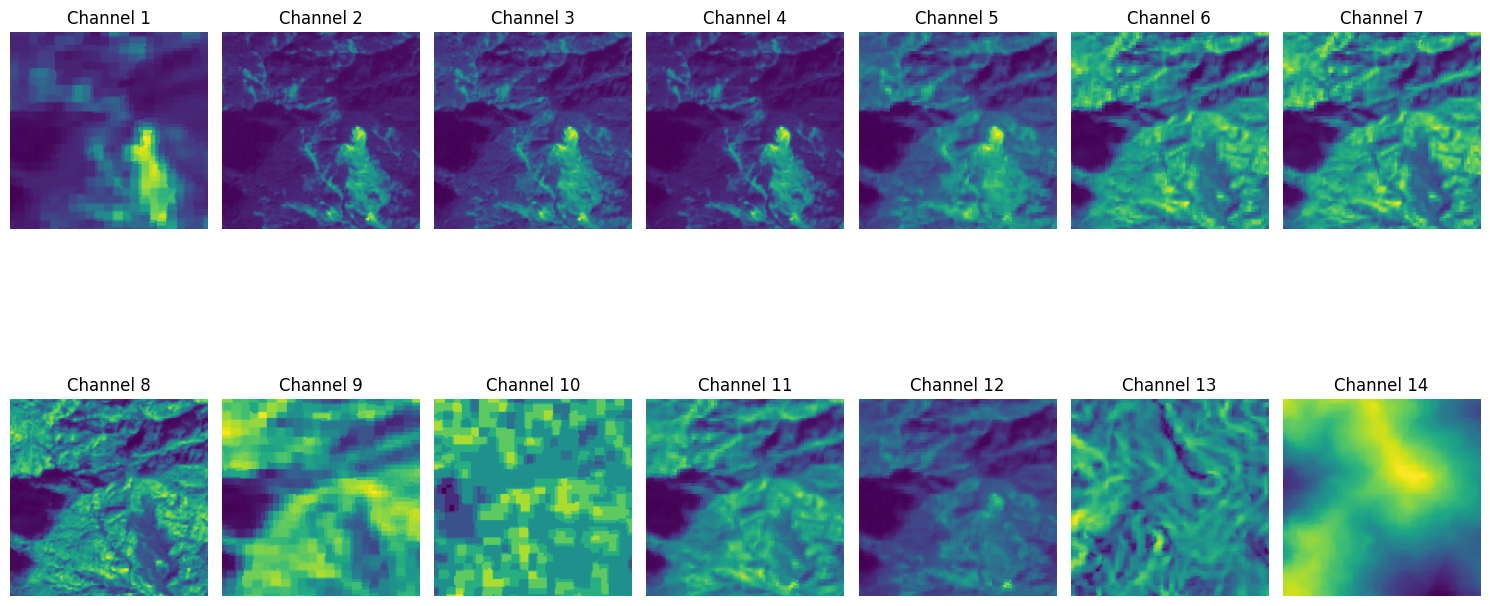

In [6]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_img, "r") as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get("img"))
    print("input data shape:", data.shape)
    
    fig, axes = plt.subplots(2, 7, figsize=(15, 9))
    axes = axes.ravel()

    for i in range(14):
        ax = axes[i]
        ax.imshow(data[:, :, i])
        ax.set_title(f"Channel {i+1}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

ls ['mask']
input data shape: (128, 128)


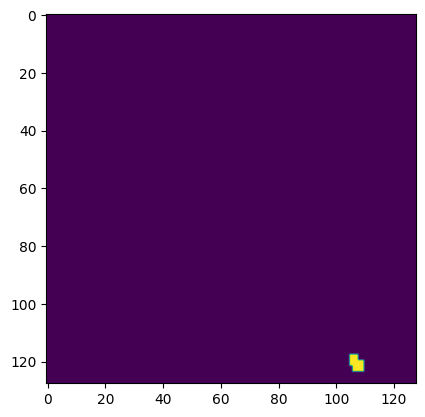

In [7]:
with h5py.File(path_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get("mask"))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [8]:
path_img = f"{dir}img/image_10.h5"
path_mask = f"{dir}mask/mask_1.h5"
TRAIN_PATH = f"{dir}img/*.h5"
TRAIN_MASK = f"{dir}mask/*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

print(path_mask)

C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask/mask_1.h5


In [9]:
tf.test.gpu_device_name()


''

In [10]:
path = f"{dir}mask/"
files = os.listdir(path)

for i, filename in enumerate(files):
    file_extension = os.path.splitext(filename)[1]
    
    temp_name = f"temp_mask_{i}{file_extension}"
    
    old_path = os.path.join(path, filename)
    temp_path = os.path.join(path, temp_name)
    
    os.rename(old_path, temp_path)

for i, temp_filename in enumerate(os.listdir(path)):
    file_extension = os.path.splitext(temp_filename)[1]
    
    new_name = f"mask_{i+1}{file_extension}"
    
    temp_path = os.path.join(path, temp_filename)
    final_path = os.path.join(path, new_name)
    os.rename(temp_path, final_path)



In [11]:
path = f"{dir}img/"
files = os.listdir(path)

for i, filename in enumerate(files):
    file_extension = os.path.splitext(filename)[1]
    
    temp_name = f"temp_mask_{i}{file_extension}"
    
    old_path = os.path.join(path, filename)
    temp_path = os.path.join(path, temp_name)
    
    os.rename(old_path, temp_path)

for i, temp_filename in enumerate(os.listdir(path)):
    file_extension = os.path.splitext(temp_filename)[1]
    
    new_name = f"image_{i+1}{file_extension}"
    
    temp_path = os.path.join(path, temp_filename)
    final_path = os.path.join(path, new_name)
    os.rename(temp_path, final_path)


In [12]:
import h5py
import numpy as np

for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    
    try:
        with h5py.File(img, "r") as hdf:
            data = np.array(hdf.get("img"))
            data[np.isnan(data)] = 0.000001

            if data.ndim != 3 or data.shape[2] < 14:
                continue

            mid_rgb = data[:, :, 1:4].max() / 2.0
            mid_slope = data[:, :, 12].max() / 2.0
            mid_elevation = data[:, :, 13].max() / 2.0

            data_red = data[:, :, 3]
            data_nir = data[:, :, 7]
            data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red), out=np.zeros_like(data_red), where=(data_nir + data_red) != 0)

            TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  
            TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb 
            TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb 
            TRAIN_XX[i, :, :, 3] = data_ndvi 
            TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope 
            TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation 
    
    except OSError as e:
        continue
    
    try:
        with h5py.File(mask, "r") as hdf:
            data = np.array(hdf.get("mask"))

            if data.ndim != 2:
                continue

            TRAIN_YY[i, :, :, 0] = data

    except OSError as e:
        print(f"Opening mask error {mask}: {e}")

print("Done")


0 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1.h5
1 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_10.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_10.h5
2 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_100.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_100.h5
3 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1000.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1000.h5
4 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/land

C:\Users\Yevheniy\AppData\Local\Temp\ipykernel_20240\3726468161.py:27: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope


17 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1013.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1013.h5
18 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1014.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1014.h5
19 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1015.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1015.h5
20 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/img\image_1016.h5 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekbahadurkshetri/landslide4sense/versions/1/TrainData/mask\mask_1016.h5
21 C:/Users/Yevheniy/.cache/kagglehub/datasets/tekba

In [13]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.688195991091314].


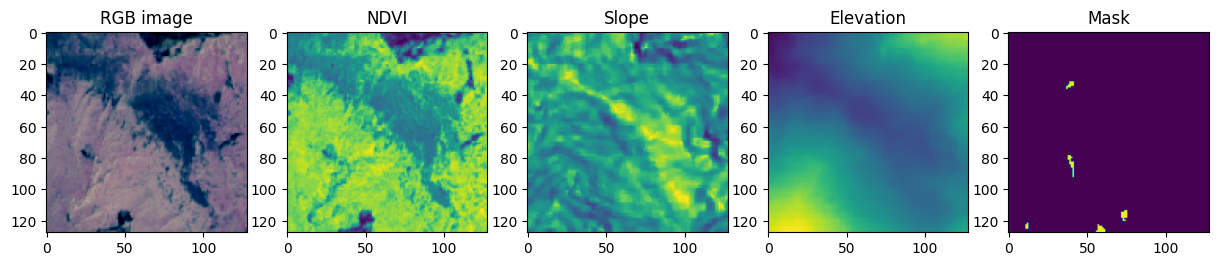

In [14]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7948717948717949].


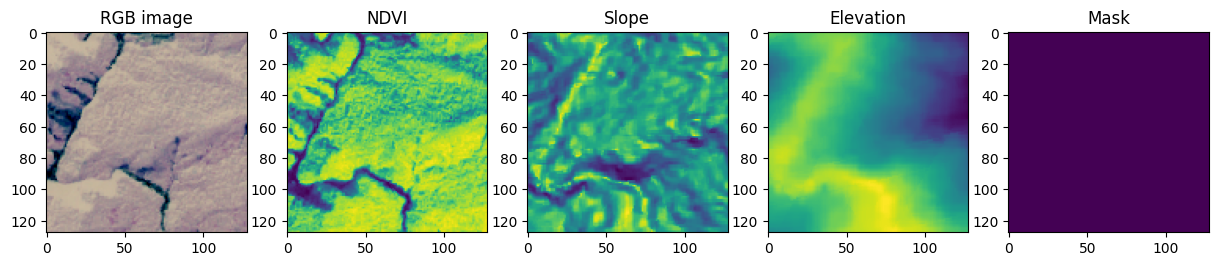

In [16]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [17]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [18]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7948717948717949].


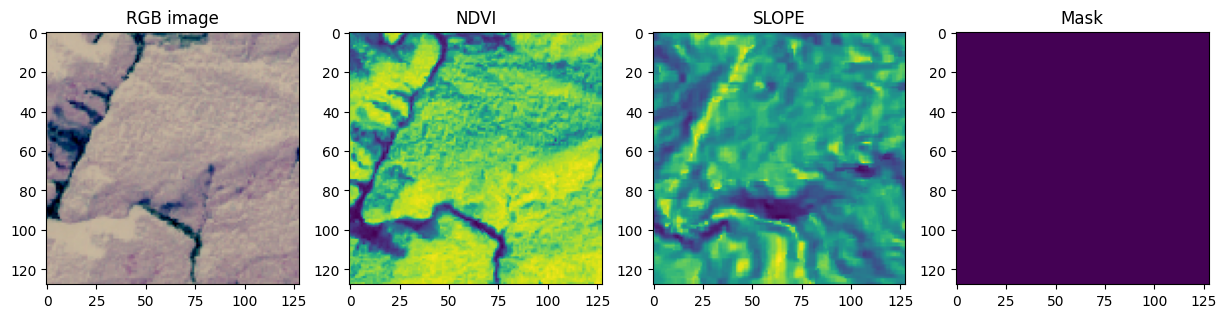

In [19]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [26]:
# Recall
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Precision
def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

# F1 Score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)


    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same")(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation="sigmoid")(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])
    
    return model


In [28]:
from keras.src.callbacks import EarlyStopping

model = unet_model(128, 128, 6)
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", verbose=2, save_best_only=True, mode="max")

callbacks = [
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=30, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=[EarlyStopping(monitor="val_loss", patience=3)])

model.save("model_save.keras")

Epoch 1/30


c:\Users\Yevheniy\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_41']. Received: the structure of inputs=*
  warnings.warn(


190/190 - 69s - 361ms/step - accuracy: 0.9741 - f1_m: 0.0011 - loss: 0.1280 - precision_m: 0.0029 - recall_m: 0.0050 - val_accuracy: 0.9777 - val_f1_m: 0.0000e+00 - val_loss: 0.1104 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/30
190/190 - 60s - 314ms/step - accuracy: 0.9784 - f1_m: 0.0000e+00 - loss: 0.1073 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.9777 - val_f1_m: 0.0000e+00 - val_loss: 0.1077 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/30
190/190 - 60s - 316ms/step - accuracy: 0.9784 - f1_m: 0.0000e+00 - loss: 0.1052 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.9777 - val_f1_m: 0.0000e+00 - val_loss: 0.1068 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/30
190/190 - 60s - 314ms/step - accuracy: 0.9784 - f1_m: 0.0000e+00 - loss: 0.1050 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.9777 - val_f1_m: 0.0000e+00 - val_loss: 0.1070 - val_precision_m: 0.0000e+00 - 

In [29]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.10607743263244629 0.9776743054389954 0.0 0.0 0.0


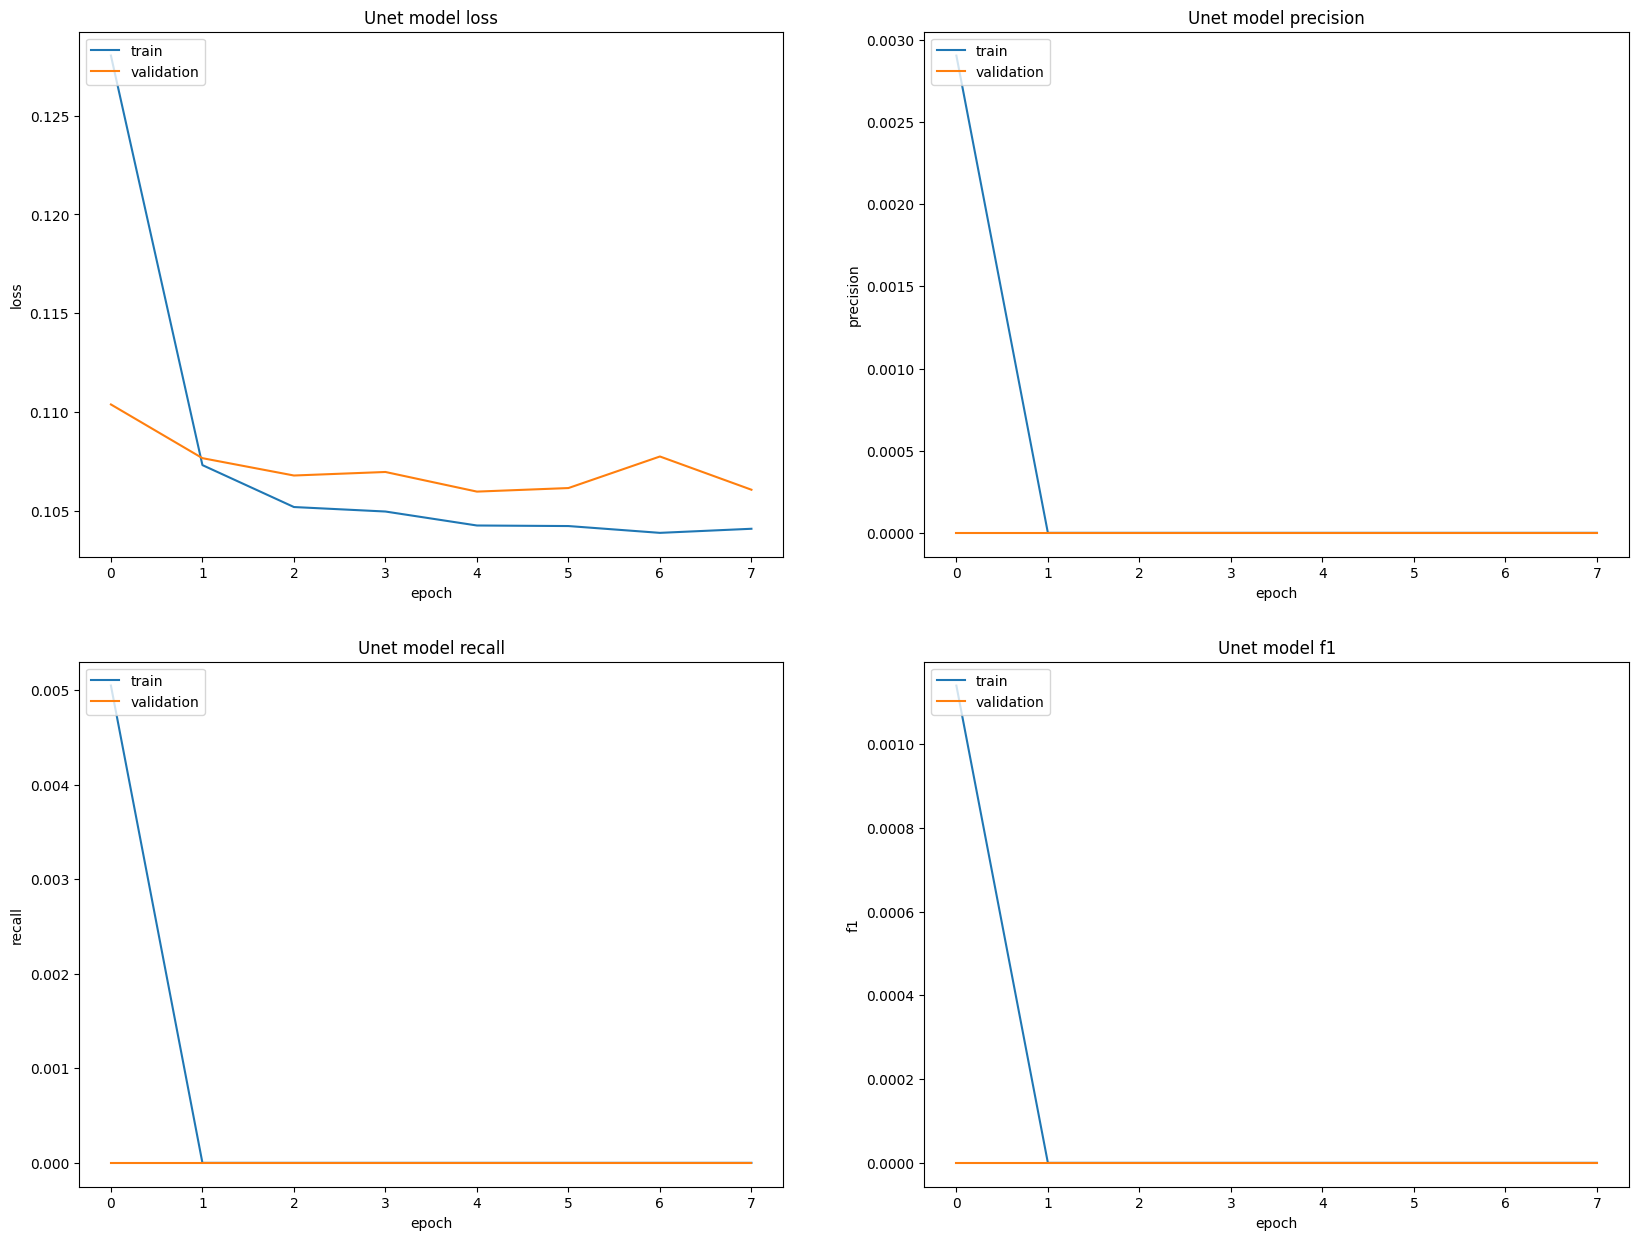

In [30]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history["loss"])
ax11.plot(history.history["val_loss"])
ax11.title.set_text("Unet model loss")
ax11.set_ylabel("loss")
ax11.set_xlabel("epoch")
ax11.legend(["train", "validation"], loc="upper left")

ax12.plot(history.history["precision_m"])
ax12.plot(history.history["val_precision_m"])
ax12.set_title("Unet model precision")
ax12.set_ylabel("precision")
ax12.set_xlabel("epoch")
ax12.legend(["train", "validation"], loc="upper left")

ax13.plot(history.history["recall_m"])
ax13.plot(history.history["val_recall_m"])
ax13.set_title("Unet model recall")
ax13.set_ylabel("recall")
ax13.set_xlabel("epoch")
ax13.legend(["train", "validation"], loc="upper left")

ax14.plot(history.history["f1_m"])
ax14.plot(history.history["val_f1_m"])
ax14.set_title("Unet model f1")
ax14.set_ylabel("f1")
ax14.set_xlabel("epoch")
ax14.legend(["train", "validation"], loc="upper left")

In [31]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7593198168737737].


Text(0.5, 1.0, 'Training Image')

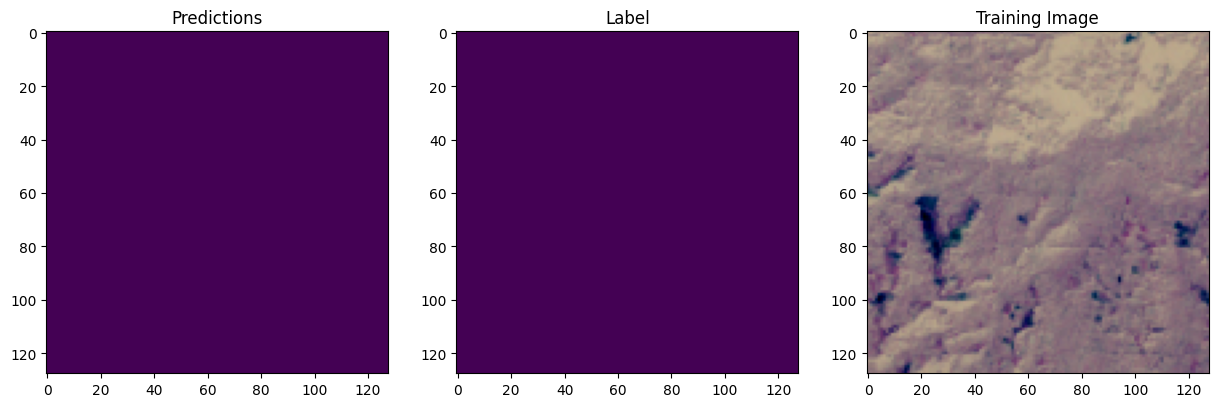

In [32]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')